In [7]:
# Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

- It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

- Set up the hypothesis test.

- Write down all the steps followed for setting up the test.

- Calculate the test statistic by hand and also code it in Python. It should be 4.76190. We will take a look at how to make decisions based on this calculated value.

- If you finished the previous question, please go through the code for principal_component_analysis_example provided in the files_for_lab folder .

- The mean systolic blood pressure is μ = 120 mm Hg
- a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg.
- Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

In [8]:
# Hypotheses
null_hypothesis = "the group has no significantly different from the regular population"  # H₀
alt_hypothesis = "the group significantly different from the regular population"  # H₁

print(f"Null Hypothesis (H₀): {null_hypothesis}")
print(f"Alternate Hypothesis (H₁): {alt_hypothesis}")

Null Hypothesis (H₀): the group has no significantly different from the regular population
Alternate Hypothesis (H₁): the group significantly different from the regular population


In [9]:
# level of significance 
alpha = 0.05
print(f"Level of Significance (α): {alpha}")

Level of Significance (α): 0.05


In [20]:
sample_mean = 130.1
pop_mean = 120
pop_std = 21.21
n = 100

In [21]:
# Calculate the test statistic (z-score)

z_stat = (sample_mean - pop_mean) / (pop_std / (n**0.5))
print(f"Test Statistic (z): {z_stat:.10f}")

Test Statistic (z): 4.7619047619


In [24]:
# Critical Value for a one-tailed test
critical_value = st.norm.ppf(alpha)
print(f"Critical Value: {critical_value:.2f}")

Critical Value: -1.64


In [30]:
# wrong way 
# calculating the p-value 
p_value = st.norm.cdf(z_stat)  # lower-tailed test
print(f"P-Value: {p_value:.10f}")

if p_value < alpha:
    print("Reject the Null Hypothesis: Significant result.")
else:
    print("Fail to Reject the Null Hypothesis: Not a significant result.")

P-Value: 0.9999990411
Fail to Reject the Null Hypothesis: Not a significant result.


In [31]:
# Determine p-Value for Two-Tailed Test
# p-value using Survival Function (sf) for two-tailed test
p_value = st.t.sf(np.abs(z_stat), df=n-1) * 2  # Multiply by 2 for a two-tailed test
print(f"P-Value: {p_value:.10f}")

if p_value < alpha:
    print("Reject the Null Hypothesis: Significant result.")
else:
    print("Fail to Reject the Null Hypothesis: Not a significant result.")

P-Value: 0.0000065627
Reject the Null Hypothesis: Significant result.


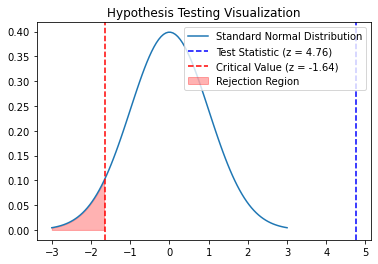

In [32]:
x = np.linspace(-3, 3, 100)
y = st.norm.pdf(x)
plt.plot(x, y, label="Standard Normal Distribution")
plt.fill_between(x, 0, y, where=(x < critical_value), color='red', alpha=0.3, label='Rejection Region')
plt.axvline(z_stat, color='blue', linestyle='--', label=f'Test Statistic (z = {z_stat:.2f})')
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value (z = {critical_value:.2f})')
plt.title("Hypothesis Testing Visualization")
plt.legend()
plt.show()